# Density - RDF: Computing Unit Cell RDFs
The RDF in `freud` is not immediately useful if the input system is a crystalline unit cell. The unit cell must be replicated in order to extend the RDF range beyond half of the box length and compute the RDF of the bulk (repeated) system. This notebook demonstrates how to replicate unit cells and compute the RDF on the replicated system.

In [1]:
import freud
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from helper_functions.box_plotting import box_2d_to_points

This generates a two-dimensional tilted box and creates a pair of points.

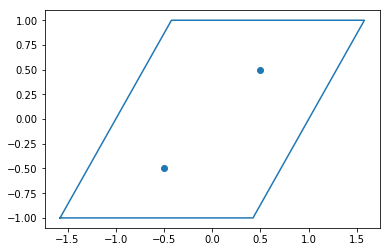

In [2]:
box = freud.box.Box(Lx=2, Ly=2, xy=np.sqrt(1./3))
points = np.asarray([[-0.5, -0.5, 0], [0.5, 0.5, 0]])
box_points = box_2d_to_points(box)
plt.scatter(points[:, 0], points[:, 1])
plt.plot(box_points[:, 0], box_points[:, 1])
plt.show()

A `ParticleBuffer` is created, to compute and store the positions of the replicated particles.

In [3]:
pb = freud.util.ParticleBuffer(box)

The `ParticleBuffer` documentation explains how to use the `compute` method:

In [4]:
help(pb.compute)

Help on method compute in module freud.util.ParticleBuffer:

compute(points, buffer, images) method of freud.util.ParticleBuffer.ParticleBuffer instance
    ParticleBuffer.compute(self, points, float buffer, bool images=False)
    Compute the particle buffer.
    
            Args:
                points ((:math:`N_{particles}`, 3) :class:`numpy.ndarray`):
                    Points used to calculate particle buffer.
                buffer (float):
                    Buffer distance for replication outside the box.
                images (bool):
                    If ``False`` (default), ``buffer`` is a distance. If ``True``,
                    ``buffer`` is a number of images to replicate in each
                    dimension.



We replicate 6 images in both the $x$ and $y$ directions.

In [5]:
n_images = 6
pb.compute(points=points, buffer=n_images, images=True)

The locations of the replicated particles can be printed:

In [6]:
pb.buffer_particles

array([[-19.428204, -12.5     ,   0.      ],
       [-18.273502, -10.5     ,   0.      ],
       [-17.118801,  -8.5     ,   0.      ],
       ...,
       [ 17.118801,   8.5     ,   0.      ],
       [ 18.273502,  10.5     ,   0.      ],
       [ 19.428204,  12.5     ,   0.      ]], dtype=float32)

We plot the original box and points (blue), along with the new box and replicated points (orange).

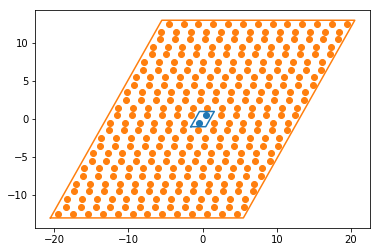

In [7]:
big_box = box * (2 * n_images + 1)
big_box_points = box_2d_to_points(big_box)
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(pb.buffer_particles[:, 0], pb.buffer_particles[:, 1])
plt.plot(box_points[:, 0], box_points[:, 1])
plt.plot(big_box_points[:, 0], big_box_points[:, 1])
plt.show()

The radial distribution function $g(r)$ is plotted below from $r=0$ to $r=10$.

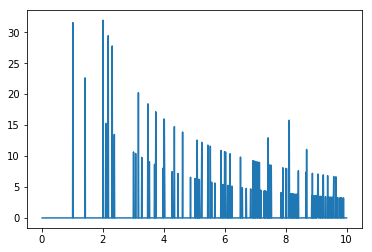

In [8]:
rdf = freud.density.RDF(rmax=10, dr=0.01)
rdf.compute(big_box, ref_points=points, points=pb.buffer_particles)
plt.plot(rdf.R, rdf.RDF)
plt.show()

Below, we demonstrate that in the limit of very large distances, the RDF looks isotropic. That is, $g(r) \approx 1$ for periodic systems with periodicity on the scale of $\ell$ when $r \gg \ell$.

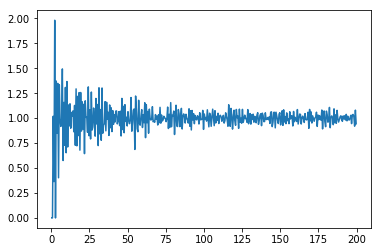

In [9]:
n_images = 400
pb.compute(points=points, buffer=n_images, images=True)
big_box = box * (2 * n_images + 1)
rdf = freud.density.RDF(rmax=200, dr=0.5)
rdf.compute(big_box, ref_points=points, points=pb.buffer_particles)
plt.plot(rdf.R, rdf.RDF)
plt.show()